In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [151]:
from numpy import math

In [ ]:
csv = "E:\\Python\\Bigmart Sales\\bigmart cleaned.csv"
df = pd.read_csv(csv)

In [5]:
df = df.iloc[:,1:]

In [11]:
df.describe(include = "all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000,8523.000000
unique,1559,NaN,2,NaN,15,NaN,10,NaN,3,3,4,NaN,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Small,Tier 3,Supermarket Type1,NaN,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,4798,3350,5577,NaN,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914,15.168133
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616,8.371760
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,4.000000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400,9.000000
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000,14.000000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400,26.000000


In [6]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4


In [10]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Meat                      489
Soft Drinks               445
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Name: Item_Type, dtype: int64

In [12]:
df["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [28]:
df_Outlet_Size = pd.get_dummies(df["Outlet_Size"], drop_first = True)
df_Outlet_Type = pd.get_dummies(df["Outlet_Type"], drop_first = True)
df_Outlet_Location_Type = pd.get_dummies(df["Outlet_Location_Type"], drop_first = True)
df_Item_Fat_Content = pd.get_dummies(df["Item_Fat_Content"], drop_first = True)

In [23]:
df_Outlet_Type.head()

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,1,0,0


In [36]:
df = df.join(df_Outlet_Location_Type)

In [37]:
df = df.join(df_Item_Fat_Content)

In [38]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Outlet_Sales,Outlet_Age,Medium,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3,Regular
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,3735.1380,14,1,0,1,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,443.4228,4,1,0,0,1,0,0,1,1


In [39]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Medium', 'Small',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Tier 2',
       'Tier 3', 'Regular'],
      dtype='object')

In [40]:
col = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Size Medium', 'Size Small',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'City Tier 2',
       'City Tier 3', 'Fat Regular']

In [41]:
df.columns = col

In [42]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Outlet_Sales,Outlet_Age,Size Medium,Size Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,City Tier 2,City Tier 3,Fat Regular
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,3735.1380,14,1,0,1,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,443.4228,4,1,0,0,1,0,0,1,1


In [45]:
df_f = df.drop(["Item_Fat_Content", "Outlet_Size", "Outlet_Establishment_Year", "Outlet_Location_Type", "Outlet_Type", "Outlet_Identifier"], axis = 1)

In [51]:
df_pca = df_f.iloc[:,7:]

In [52]:
scale = preprocessing.StandardScaler()

In [66]:
xyz = scale.fit_transform(df_pca)

In [71]:
df_pca = pd.DataFrame(xyz)

In [77]:
pca = PCA(.94)

In [78]:
principal = pca.fit_transform(df_pca)

In [79]:
df_principal = pd.DataFrame(data = principal)

In [83]:
df_principal.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.530373,-0.007091,-0.685088,2.061783,0.058171,0.805714
1,3.140134,2.289587,1.315939,-0.305988,-0.670445,-0.101508


In [76]:
df_pca.head(2)

,0,1,2,3,4,5,6,7
0,1.432326,-1.134925,0.726802,-0.349551,-0.351028,-0.696678,-0.804732,-0.738147
1,1.432326,-1.134925,-1.375891,2.860816,-0.351028,-0.696678,1.242650,1.354743


In [82]:
df_principal.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]

In [84]:
df_principal.shape

(8523, 6)

In [86]:
df_f2 = df_f.join(df_principal)

In [87]:
df_f2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age', 'Size Medium',
       'Size Small', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'City Tier 2', 'City Tier 3', 'Fat Regular', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
      dtype='object')

In [89]:
df_f2 = df_f2.drop(["Size Medium",'Size Small', 'Supermarket Type1', 'Supermarket Type2','Supermarket Type3', 'City Tier 2', 'City Tier 3', 'Fat Regular'], axis = 1)

In [90]:
df_f2.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,PC1,PC2,PC3,PC4,PC5,PC6
Item_Weight,1.000000,-0.014048,0.027141,0.014123,0.011588,1.131640e-02,9.890959e-04,-2.316301e-02,5.784602e-03,1.488207e-02,-1.588498e-03
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625,0.074834,-9.170641e-03,1.137085e-02,4.311526e-02,-1.865457e-01,1.047670e-01,1.295220e-01
Item_MRP,0.027141,-0.001315,1.000000,0.567574,-0.005020,-3.531055e-03,7.109241e-03,5.987925e-03,7.090940e-05,1.998854e-03,-3.700209e-03
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000,0.049135,1.092051e-01,-2.324932e-01,2.636267e-02,2.377524e-01,-2.090365e-01,-1.698575e-01
Outlet_Age,0.011588,0.074834,-0.005020,0.049135,1.000000,3.076411e-01,-6.699254e-01,2.417964e-03,-5.338517e-02,5.275117e-01,6.165684e-02
PC1,0.011316,-0.009171,-0.003531,0.109205,0.307641,1.000000e+00,-3.934776e-16,1.844970e-16,-2.530114e-15,2.155698e-15,-1.168105e-15
PC2,0.000989,0.011371,0.007109,-0.232493,-0.669925,-3.934776e-16,1.000000e+00,1.091095e-16,3.093700e-16,5.948543e-16,2.281118e-16
PC3,-0.023163,0.043115,0.005988,0.026363,0.002418,1.844970e-16,1.091095e-16,1.000000e+00,-7.271552e-17,-1.213681e-16,-5.482509e-16
PC4,0.005785,-0.186546,0.000071,0.237752,-0.053385,-2.530114e-15,3.093700e-16,-7.271552e-17,1.000000e+00,1.212340e-15,-6.093394e-17
PC5,0.014882,0.104767,0.001999,-0.209037,0.527512,2.155698e-15,5.948543e-16,-1.213681e-16,1.212340e-15,1.000000e+00,1.141894e-15


In [110]:
df_f2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,PC1,PC2,PC3,PC4,PC5,PC6
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,12.857645,0.066132,140.992782,2181.288914,15.168133,-4.172031e-16,-1.573699e-16,-3.032369e-16,-1.240420e-16,-7.635958e-17,-1.191637e-16
std,4.226124,0.051598,62.275067,1706.499616,8.371760,1.937760e+00,1.059646e+00,1.000098e+00,9.198303e-01,8.336328e-01,6.776356e-01
min,4.555000,0.000000,31.290000,33.290000,4.000000,-2.038366e+00,-2.266375e+00,-7.860292e-01,-1.912587e+00,-6.892187e-01,-1.222602e+00
25%,9.310000,0.026989,93.826500,834.247400,9.000000,-2.034492e+00,-8.897590e-03,-7.374327e-01,-2.533027e-01,-6.885153e-01,-3.282284e-01
50%,12.857645,0.053931,143.012800,1794.331000,14.000000,4.355937e-01,-7.257329e-03,-7.286374e-01,-8.192145e-02,-6.695217e-01,-1.013851e-01
75%,16.000000,0.094585,185.643700,3101.296400,26.000000,5.342465e-01,1.516569e-02,1.354647e+00,9.433153e-02,7.835514e-01,7.344925e-01
max,21.350000,0.328391,266.888400,13086.964800,28.000000,3.141364e+00,2.289587e+00,1.406991e+00,2.061783e+00,1.578266e+00,1.443557e+00


In [160]:
x = df_f2.drop(["Item_Outlet_Sales", "Item_Identifier", "Item_Type"], axis = 1)
x["Item_MRP"] = np.log10(x["Item_MRP"])
y = np.log10(df["Item_Outlet_Sales"])

In [161]:
x.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,PC1,PC2,PC3,PC4,PC5,PC6
0,9.30,0.016047,2.397608,14,0.530373,-0.007091,-0.685088,2.061783,0.058171,0.805714
1,5.92,0.019278,1.683670,4,3.140134,2.289587,1.315939,-0.305988,-0.670445,-0.101508


In [162]:
x.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,PC1,PC2,PC3,PC4,PC5,PC6
count,8523.000000,8523.000000,8523.000000,8523.000000,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,12.857645,0.066132,2.096853,15.168133,-4.172031e-16,-1.573699e-16,-3.032369e-16,-1.240420e-16,-7.635958e-17,-1.191637e-16
std,4.226124,0.051598,0.228481,8.371760,1.937760e+00,1.059646e+00,1.000098e+00,9.198303e-01,8.336328e-01,6.776356e-01
min,4.555000,0.000000,1.495406,4.000000,-2.038366e+00,-2.266375e+00,-7.860292e-01,-1.912587e+00,-6.892187e-01,-1.222602e+00
25%,9.310000,0.026989,1.972326,9.000000,-2.034492e+00,-8.897590e-03,-7.374327e-01,-2.533027e-01,-6.885153e-01,-3.282284e-01
50%,12.857645,0.053931,2.155375,14.000000,4.355937e-01,-7.257329e-03,-7.286374e-01,-8.192145e-02,-6.695217e-01,-1.013851e-01
75%,16.000000,0.094585,2.268680,26.000000,5.342465e-01,1.516569e-02,1.354647e+00,9.433153e-02,7.835514e-01,7.344925e-01
max,21.350000,0.328391,2.426330,28.000000,3.141364e+00,2.289587e+00,1.406991e+00,2.061783e+00,1.578266e+00,1.443557e+00


In [163]:
y.head(2)

0    3.572307
1    2.646818
Name: Item_Outlet_Sales, dtype: float64

In [164]:
np.log10(x["Item_MRP"])

0       0.379778
1       0.226257
2       0.332664
3       0.354166
4       0.238367
5       0.233242
6       0.245726
7       0.308023
8       0.298121
9       0.356742
10      0.219688
11      0.334191
12      0.335016
13      0.317649
14      0.360449
15      0.243282
16      0.314292
17      0.239372
18      0.312636
19      0.373415
20      0.380112
21      0.334454
22      0.360476
23      0.307964
24      0.345871
25      0.220597
26      0.211242
27      0.202041
28      0.219609
29      0.214828
          ...   
8493    0.357342
8494    0.310338
8495    0.343498
8496    0.355645
8497    0.337680
8498    0.321272
8499    0.301034
8500    0.321700
8501    0.301440
8502    0.368342
8503    0.318025
8504    0.311386
8505    0.366221
8506    0.383864
8507    0.302708
8508    0.361706
8509    0.367429
8510    0.373783
8511    0.383686
8512    0.352406
8513    0.300940
8514    0.245599
8515    0.341901
8516    0.247746
8517    0.352654
8518    0.367630
8519    0.308363
8520    0.2855

## Model 1: Linear Regression

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [213]:
x_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,PC1,PC2,PC3,PC4,PC5,PC6
count,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000
mean,12.841509,0.066376,2.097749,15.177506,-0.022515,-0.008323,0.009411,-0.005589,0.001123,-0.000979
std,4.250994,0.051610,0.228676,8.334167,1.933529,1.051001,1.002901,0.916219,0.834166,0.675491
min,4.555000,0.000000,1.495406,4.000000,-2.038366,-2.266375,-0.786029,-1.912587,-0.689219,-1.222602
25%,9.300000,0.026941,1.971832,9.000000,-2.034492,-0.008898,-0.737433,-0.253303,-0.688515,-0.328228
50%,12.857645,0.054364,2.155127,14.000000,-0.417959,-0.007257,-0.728637,-0.081921,-0.669522,-0.101385
75%,16.000000,0.095565,2.270557,26.000000,0.534247,0.015166,1.354647,0.094332,0.783551,0.734492
max,21.350000,0.328391,2.426330,28.000000,3.141364,2.289587,1.406991,2.061783,1.578266,1.443557


In [214]:
model_1 = LinearRegression()

In [215]:
model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [216]:
model_1_prediction = model_1.predict(x_test)

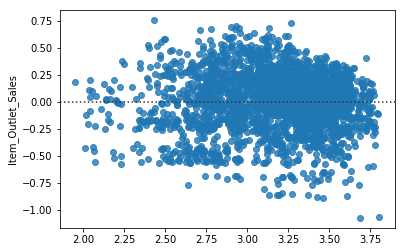

In [217]:
sns.residplot(model_1_prediction, y_test)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


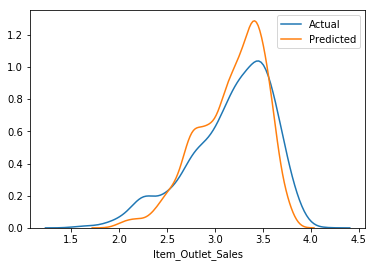

In [218]:
ax1 = sns.distplot(y_test, hist = False, label = "Actual")
sns.distplot(model_1_prediction, hist = False, label = "Predicted", ax = ax1)

In [219]:
cv_score_1 = cross_val_score(model_1, x_test, y_test, cv = 4)
print(cv_score_1)

[0.61243011 0.61011053 0.65599296 0.60320357]


## Model 2: Polynomial Regression

In [249]:
poly_reg = pf(degree = 2)

In [250]:
x_train_poly = poly_reg.fit_transform(x_train)

In [251]:
model_2 = LinearRegression()
model_2.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
x_test_poly = poly_reg.fit_transform(x_test)

In [253]:
model_2_prediction = model_2.predict(x_test_poly)

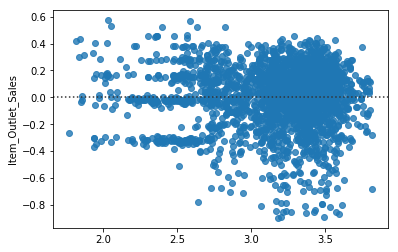

In [254]:
sns.residplot(model_2_prediction, y_test)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


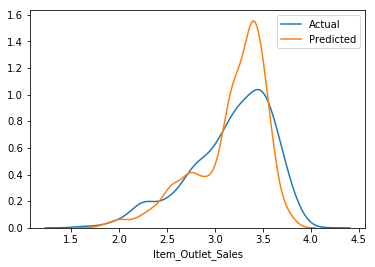

In [255]:
ax1 = sns.distplot(y_test, hist = False, label = "Actual")
sns.distplot(model_2_prediction, hist = False, label = "Predicted", ax = ax1)

In [256]:
cv_score_2 = cross_val_score(model_2, x_test, y_test, cv = 4)
print(cv_score_2)

[0.61243011 0.61011053 0.65599296 0.60320357]


In [257]:
model2pred = 10**model_2_prediction

In [258]:
model2actual = 10**y_test

In [259]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [260]:
rmse(model2pred, model2actual)

1088.865318649368

In [246]:
model1pred = 10**model_1_prediction
model1actual = 10**y_test

In [247]:
rmse(model1pred, model1actual)

1229.9472614121003

In [261]:
csv_2 = "E:\\Python\\Bigmart Sales\\test.csv"
DF = pd.read_csv(csv_2)

In [267]:
DF["Item_Fat_Content"].replace("LF", "Low Fat", inplace = True)

In [268]:
DF["Item_Fat_Content"].replace("reg", "Regular", inplace = True)

In [269]:
DF_Outlet_Size = pd.get_dummies(DF["Outlet_Size"], drop_first = True)
DF_Outlet_Type = pd.get_dummies(DF["Outlet_Type"], drop_first = True)
DF_Outlet_Location_Type = pd.get_dummies(DF["Outlet_Location_Type"], drop_first = True)
DF_Item_Fat_Content = pd.get_dummies(DF["Item_Fat_Content"], drop_first = True)

In [271]:
DF = DF.join([DF_Outlet_Size,DF_Outlet_Type,DF_Outlet_Location_Type, DF_Item_Fat_Content])

In [273]:
DF.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Medium', 'Small', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'Tier 2', 'Tier 3', 'Regular',
       'low fat'],
      dtype='object')

In [274]:
COLS = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Size Medium', 'Size Small', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'City Tier 2', ' City Tier 3', 'Fat Regular',
       'low fat']

In [277]:
DF.columns = COLS

In [278]:
DF.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Size Medium,Size Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,City Tier 2,City Tier 3,Fat Regular,low fat
0,FDR07,21.35,Low Fat,0.078184,Fruits and Vegetables,96.8094,OUT017,2007,Small,Tier 2,Supermarket Type1,0,1,1,0,0,1,0,0,0
1,FDR07,21.35,Low Fat,0.077729,Fruits and Vegetables,97.0094,OUT035,2004,Small,Tier 2,Supermarket Type1,0,1,1,0,0,1,0,0,0


In [279]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Size Medium',
       'Size Small', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'City Tier 2', 'City Tier 3', 'Fat Regular'],
      dtype='object')

In [280]:
DF.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Size Medium', 'Size Small', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'City Tier 2', ' City Tier 3',
       'Fat Regular', 'low fat'],
      dtype='object')